# CD4+ T cell behavior in COVID-19 infection


In [1]:
time <- NULL

IFNGe <- 1
IL12e <- 1
IL2e <- 1
IL4e <- 0
IL6e <- 0
TGFBe <- 0
IL10e <- 0

In [2]:
# Load library and BoolNetPerturb functions
library(dplyr)
library(BoolNet)
library(alluvial)
source( 'BooleanHelper.r' )
for (f in list.files("BNP")) { source( paste('BNP/', f, sep='') ) }


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
# Load data
labels <- read.csv("data/thsocs_label.csv")
enviro <- list( 'IFNGe'=IFNGe, 'IL12e'=IL12e, 'IL2e'=IL2e, 'IL4e'=IL4e, 'IL6e'=IL6e, 'TGFBe'=TGFBe, 'IL10e'=IL10e )
net <-  loadNetwork("data/thsocs_net.csv")
net <- fixGenes(net, names(enviro), enviro)

In [4]:
# Simulate perturbations
replace <- list('TexTex'='Tex',"Th1RTex"="Tr*","Th1RTh17RTex"="Tr*",
                "Th2RTh17RTex"="Tr*","Th17RTex"="Tr*","Naive"="Tex")
file.name <- paste(c("results/thsocs_cfm_simulation.csv"), collapse='')
cfm <- f.cfm.table(net, labels, file.name, time=time, replace=replace)
cfm <- cfm[cfm$initial!='Naive',]

`summarise()` has grouped output by 'initial'. You can override using the `.groups` argument.


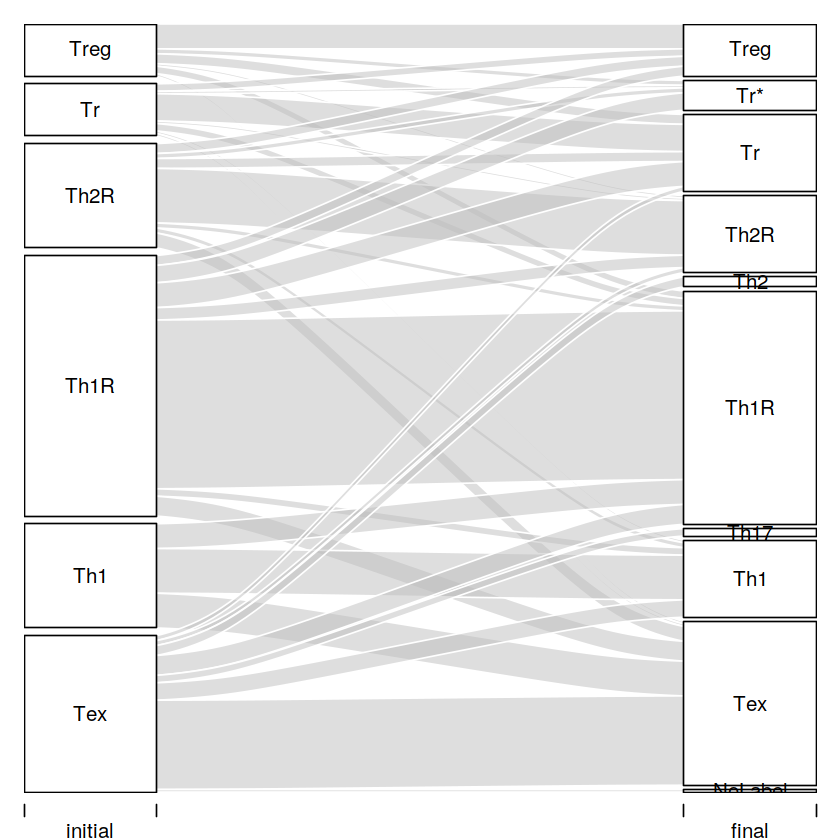

In [5]:
# Create alluvial
cfm2d <- cfm %>% group_by(initial, final) %>% summarize(freq = n())
alluvial(cfm2d[,1:2], freq=cfm2d$freq)

In [6]:
# Show transitions 
cfm.diff <- cfm[cfm['initial']!=cfm['final'],]
cfm.diff <- cfm.diff %>% group_by(initial, final, genes, values) %>% summarize(freq = n())
cfm.diff

`summarise()` has grouped output by 'initial', 'final', 'genes'. You can override using the `.groups` argument.


initial,final,genes,values,freq
Tex,NoLabel,FOXP3,1,1
Tex,Th1,IFNG,1,3
Tex,Th1,IL2,0,1
Tex,Th1,IL6,0,1
Tex,Th1,SOCS1,0,2
Tex,Th17,RORGT,1,1
Tex,Th17,TGFB,1,1
Tex,Th17,TGFBe,1,1
Tex,Th1R,FOXP3,1,2
Tex,Th1R,IL10,1,1


[1] Tex   Th2R  Th1R  Treg  Th1   Tr    Naive
Levels: Naive Tex Th1 Th1R Th2R Tr Treg

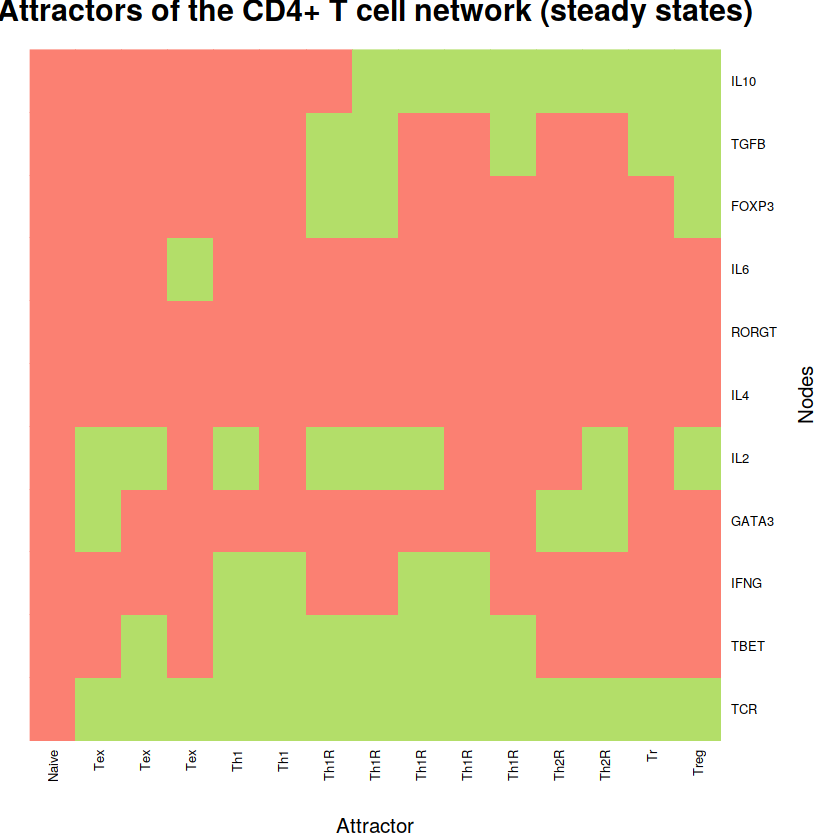

In [7]:
attr.table <- get.attr.table(net, labels, simplify=T, method="sat.exhaustive",
                             file.name='results/thsocs_attr_table.csv' )
#tail(attr.table,10)
unique(attr.table$label)

selected.nodes <- c("TCR", "TBET","IFNG","GATA3","IL2","IL4","RORGT","IL6","FOXP3","TGFB","IL10")
file.name <- NULL
#file.name <- "images/thsocs_attr_table.pdf"
plot.attr.table(attr.table, file.name=file.name,
                title='Attractors of the CD4+ T cell network', selected.nodes=selected.nodes)

Done

In [9]:
write.csv( cfm.diff, 'results/thsocs_cfm_covlev.csv' )